# Introduction to Deep Learning Using Keras

[Keras](https://keras.io/) is a high-level API for deep learning. It is written in Python and can run on top of [Theano](http://deeplearning.net/software/theano/) or [TensorFlow](https://www.tensorflow.org/), two very popular libraries for neural networks in Python. It allows users to implement deep learning models very fast and with minimum effort. In the past years, the contribution of Keras to research in deep learning has been significant since it has allowed researchers to go from ideas to results with the least possible delay.



In this part of the lab, we will implement a simple feedforward neural network to perform classification on a synthetic dataset, of two classes. Your first objective is to create this dataset. It will consist of 200 points in the 2-dimensional space $(N = 200, d = 2)$. Each point will belong either to class 0 or to class 1 (100 points per class), drawn from a Gaussian distribution: 

$$
    \mathbf{x}_i \sim \mathcal{N}(\boldsymbol \mu_k, \boldsymbol \Sigma_k)
$$

for class $k$. For class 0, $\boldsymbol{\mu}_0 = [1,1]$ and standard deviation $0.5$ for each dimension. For class 1, $\boldsymbol{\mu}_1 = [-1,-1]$ and standard deviation $0.5$. To generate these values make use of the [`randn`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html) function of NumPy that returns a sample from the "standard normal" distribution as follows: 

```python
sd * np.random.randn(...) + mu
```

In [1]:
import numpy as np

N = 200
d = 2
num_classes = 2

X = np.zeros((N, d))
y = np.zeros(N, dtype=np.int64)

X[:N//2,:] = 0.5 * np.random.randn(N//2, 2) + [1, 1]
X[N//2:,:] = 0.5 * np.random.randn(N//2, 2) + [-1, -1]

y[:N//2] = 1

After generating the 200 points, plot them in a 2-dimensional plane using [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter). Use the same color for points belonging to the same class.

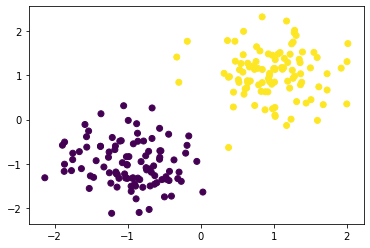

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:,0], X[:,1], c=y)

Then, split the dataset into a training and a test set using the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of scikit-learn. Set the proportion of the dataset to be included in the test set to 0.2.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now you will use Keras to implement a simple feedforward neural network. In Keras, of particular importance is the notion of a model. The model is the data structure upon which the neural network is built. The most common type of model is the Sequential model, which corresponds to a linear stack of layers. We next initialize a Sequential model.

In [4]:
from tensorflow.keras.models import Sequential

model = Sequential()

After creating a Sequence, we can add layers to it. In this example, we will add a hidden layer and the output layer. The hidden layer will consist of 64 hidden units and the output of each neuron will be activated by the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. The output layer will contain 1 neuron which corresponds to the probability that an instance belongs to class 1 of our problem. 
Both these layers are fully-connected neural network layers and can be implemented using the [Dense](https://keras.io/layers/core/#dense) class of Keras.

In [5]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=64, activation='relu', input_shape=(2,)))
model.add(Dense(units=1, activation='sigmoid'))

After defining the model, we compile it to configure its learning process. More specifically, we can specify the loss function and the optimizer and its parameters.

In [6]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import SGD

model.compile(loss=binary_crossentropy, optimizer=SGD(lr=0.01, momentum=0.9))

Once compiled, we can train the model by iterating on the training data in batches.

In [7]:
model.fit(X_train, y_train, epochs=5, batch_size=16)

Train on 160 samples
Epoch 1/5
160/160 [==============================] - 1s 3ms/sample - loss: 0.6888
Epoch 2/5
160/160 [==============================] - 0s 133us/sample - loss: 0.4364
Epoch 3/5
160/160 [==============================] - 0s 155us/sample - loss: 0.2472
Epoch 4/5
160/160 [==============================] - 0s 248us/sample - loss: 0.1463
Epoch 5/5
160/160 [==============================] - 0s 212us/sample - loss: 0.0968


Once trained, we can use your model to generate predictions on new data. Predictions are real values between 0 and 1. Set predictions larger than 0.5 to 1 and predictions smaller than 0.5 to 0.

In [8]:
y_pred = model.predict(X_test, batch_size=16)[:,0]

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
print(y_pred)

[0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0.]


Finally, we will calculate the accuracy of the model by comparing the predictions against the ground truth class labels. Use the [`accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function of scikit-learn to compute the accuracy.

In [9]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


Using the `pcolormesh` function, we can plot the decision surface of the network with regard to the input space. This is demonstrated as follows. Use your code from above (using `scatter`) to plot the data points over this surface.

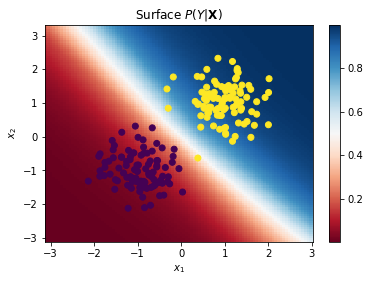

In [10]:
plt.figure()
xx1, xx2 = np.meshgrid(
    np.linspace(min(X[:,0]-1),max(X[:,0]+1),num=100), 
    np.linspace(min(X[:,1]-1),max(X[:,1]+1),num=100)
)
p_y = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
plt.pcolormesh(xx1, xx2, p_y.reshape(*xx1.shape), cmap='RdBu')
plt.colorbar()
plt.title("Surface $P(Y | \mathbf{X})$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.scatter(X[:,0], X[:,1], c=y)

Produce the same visualization for the XOR problem.

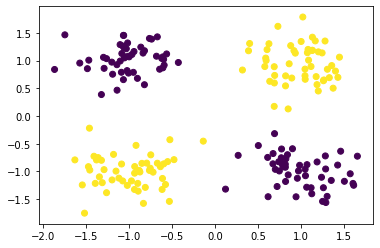

In [11]:
N = 200
d = 2
num_classes = 2

X = np.zeros((N, d))
y = np.zeros(N, dtype=np.int64)

X[:N//4,:] = 0.3 * np.random.randn(N//4, 2) + [1, 1]
X[N//4:N//2,:] = 0.3 * np.random.randn(N//4, 2) + [-1, -1]

X[N//2:(3*N)//4,:] = 0.3 * np.random.randn(N//4, 2) + [-1, 1]
X[(3*N)//4:,:] = 0.3 * np.random.randn(N//4, 2) + [1, -1]

y[:N//2] = 1

plt.scatter(X[:,0], X[:,1], c=y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(2,)))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss=binary_crossentropy, optimizer=SGD(lr=0.01, momentum=0.9))

model.fit(X_train, y_train, epochs=5, batch_size=16)

Train on 160 samples
Epoch 1/5
160/160 [==============================] - 0s 2ms/sample - loss: 0.6510
Epoch 2/5
160/160 [==============================] - 0s 113us/sample - loss: 0.5825
Epoch 3/5
160/160 [==============================] - 0s 161us/sample - loss: 0.5045
Epoch 4/5
160/160 [==============================] - 0s 143us/sample - loss: 0.4344
Epoch 5/5
160/160 [==============================] - 0s 207us/sample - loss: 0.3736


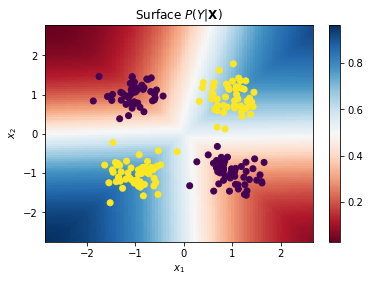

In [14]:
plt.figure()
xx1, xx2 = np.meshgrid(
    np.linspace(min(X[:,0]-1),max(X[:,0]+1),num=100), 
    np.linspace(min(X[:,1]-1),max(X[:,1]+1),num=100)
)
p_y = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
plt.pcolormesh(xx1, xx2, p_y.reshape(*xx1.shape), cmap='RdBu')
plt.colorbar()
plt.title("Surface $P(Y | \mathbf{X})$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.scatter(X[:,0], X[:,1], c=y)